In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('Датасет №1_Airline Passenger Satisfaction_mod.csv', sep=',')

In [89]:
for col in df.select_dtypes(include=['float']).columns:
    # Check if all values in the column are whole numbers
    if (df[col].dropna() % 1 == 0).all():
        # Convert to Int64 (nullable integer type) to handle potential NaNs
        df[col] = df[col].astype(pd.Int64Dtype())

In [90]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Date
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,2022-10-20
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,2022-10-08
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0,satisfied,2022-10-11
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,2022-10-25
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0,satisfied,2022-10-23


In [91]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Date'],
      dtype='object')

In [92]:
df.shape

(103910, 25)

In [93]:
df.dtypes

id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                Int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      Int64
Baggage handling                      Int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes        

In [94]:
df = df.drop_duplicates().reset_index(drop=True)

In [95]:
# Названия столбцов приведены к единому формату

In [96]:
df.rename(columns = {"satisfaction": "Satisfaction"}, inplace = True)

In [97]:
df["Satisfaction"] = df["Satisfaction"].replace(["neutral or dissatisfied", "satisfied"], ["Neutral or Dissatisfied", "Satisfied"])

In [98]:
df["Customer Type"] = df["Customer Type"].replace("disloyal Customer", "Disloyal Customer")

In [99]:
df["Class"] = df["Class"].replace(["Econom", "Busines"], ["Eco", "Business"])

In [100]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle_Aged', 'Senior'])

In [101]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)
df['Signup_Weekday'] = df['Date'].dt.weekday  # День недели (0 - Пн, 6 - Вс)
df['Signup_Weekend'] = (df['Signup_Weekday'] >= 5).astype(int)  # Флаг выходного дня

In [102]:
df["Class"].value_counts()

Class
Business    49654
Eco         46758
Eco Plus     7492
Name: count, dtype: int64

In [106]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
Date                                 0
Age_Group                

In [104]:
# Удалены нулевые значения

In [107]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Ease of Online booking"] = df["Ease of Online booking"].fillna(df["Ease of Online booking"].median())
df["Leg room service"] = df["Leg room service"].fillna(df["Leg room service"].median())
df["Baggage handling"] = df["Baggage handling"].fillna(df["Baggage handling"].mode()[0])
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(0)
df["Age_Group"] = df["Age_Group"].fillna(df["Age_Group"].mode()[0])

In [108]:
# Удалены выбросы

In [109]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Применяем обработку выбросов
df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Flight Distance')

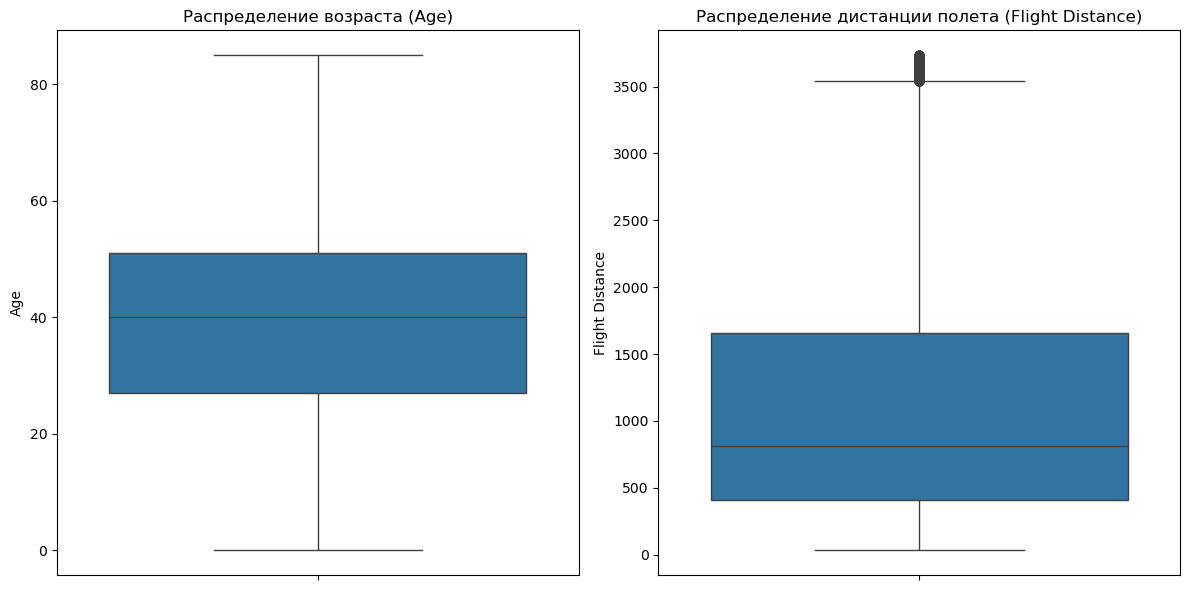

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Распределение возраста (Age)")

plt.subplot(1,2,2)
sns.boxplot(y=df["Flight Distance"])
plt.title("Распределение дистанции полета (Flight Distance)")


plt.tight_layout()
plt.show()

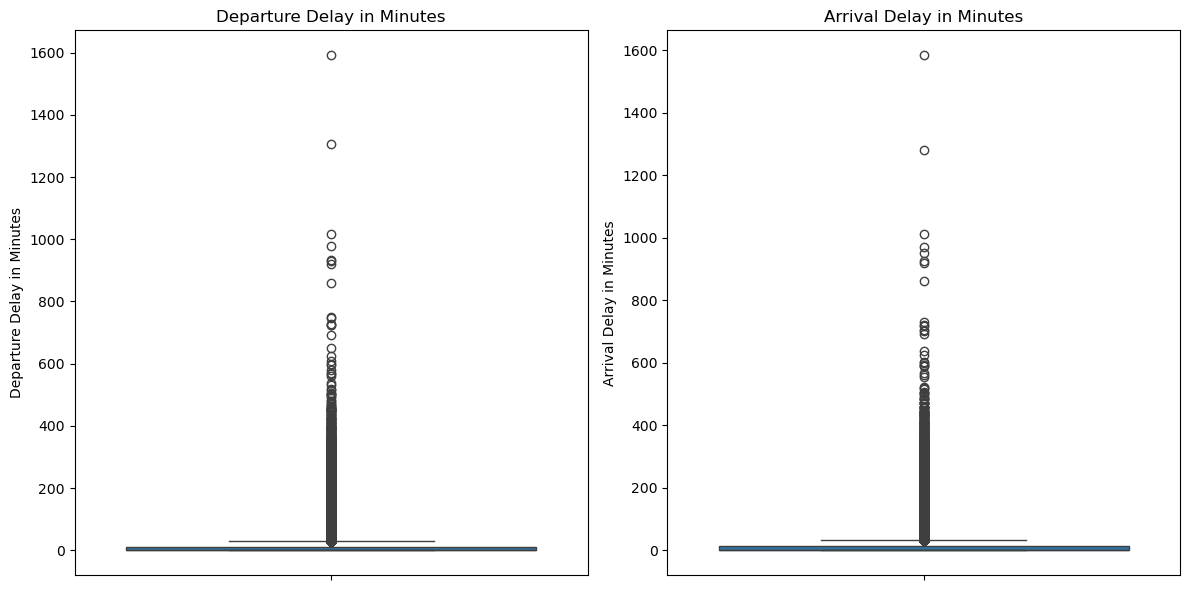

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Departure Delay in Minutes'])
plt.title("Departure Delay in Minutes")

plt.subplot(1,2,2)
sns.boxplot(y=df["Arrival Delay in Minutes"])
plt.title("Arrival Delay in Minutes")


plt.tight_layout()
plt.show()


In [112]:
# Создан столбец общего удовлетворения путешественников

In [113]:
df["Overall_Satisfaction"] = df.iloc[:, 7:21].sum(axis=1)

In [114]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Date,Age_Group,Signup_Weekday,Signup_Weekend,Overall_Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,5,25,18,Neutral or Dissatisfied,2022-10-20,Young,3,0,54
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,4,1,1,6,Neutral or Dissatisfied,2022-10-08,Young,5,1,32
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,5,0,0,Satisfied,2022-10-11,Adult,1,0,52
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,4,2,11,9,Neutral or Dissatisfied,2022-10-25,Young,1,0,42
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,0,0,Satisfied,2022-10-23,Middle_Aged,6,1,49


In [115]:
# Уровень удовлетворенности лояльных и нелояльных клиентов

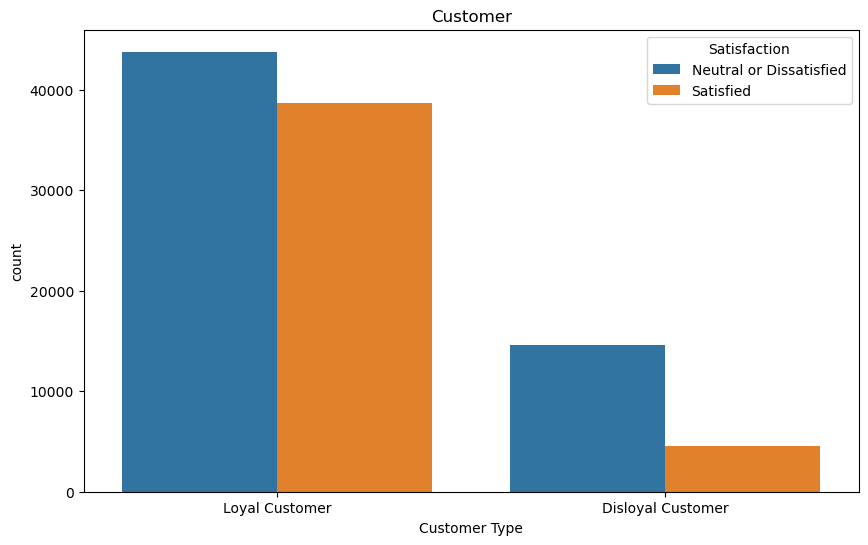

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x="Customer Type", hue="Satisfaction")

plt.title("Customer")
plt.show()

In [117]:
# Распределение удовлетворенности по классам путешественников

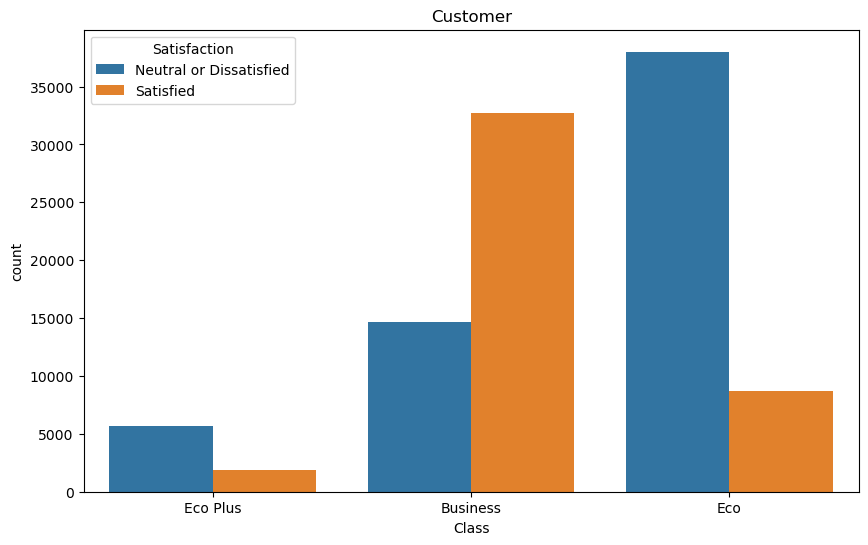

In [118]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x="Class", hue="Satisfaction")

plt.title("Customer")
plt.show()

In [119]:
# Доля путешественников в каждом классе

<Figure size 1000x600 with 0 Axes>

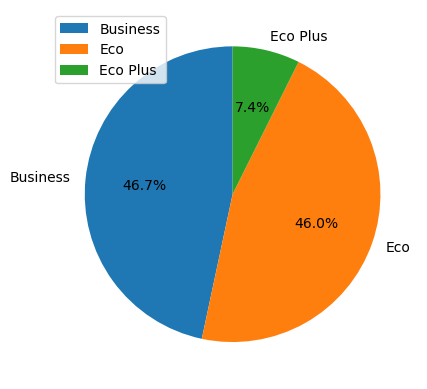

In [120]:
all_classes = df["Class"].value_counts()
class_names = df["Class"].unique()
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.pie(all_classes, labels=all_classes.index, autopct='%1.1f%%', startangle=90)
ax.legend()
plt.show()

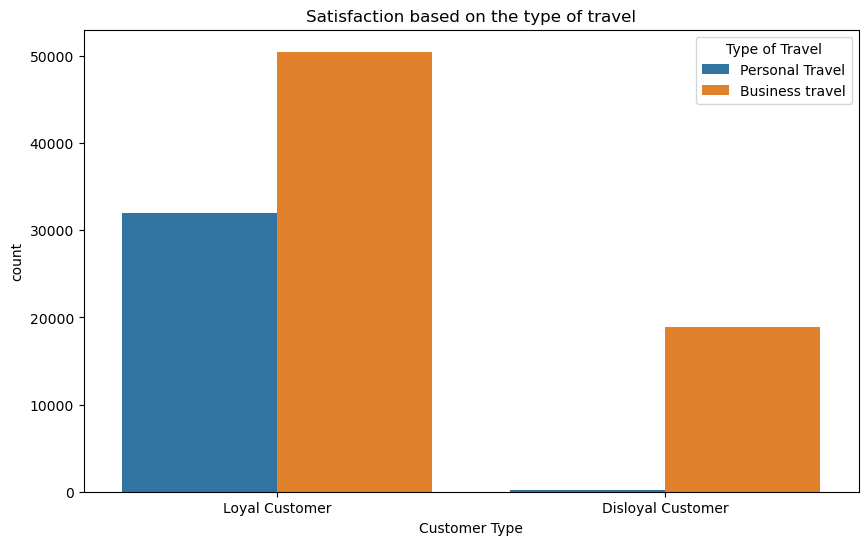

In [121]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x="Customer Type", hue="Type of Travel")

plt.title("Satisfaction based on the type of travel")
plt.show()

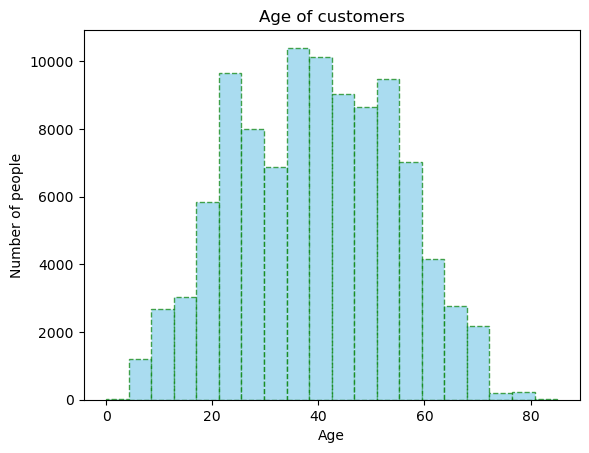

In [122]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor='green',linestyle='--', alpha = 0.7)

plt.title("Age of customers")
plt.xlabel("Age")
plt.ylabel("Number of people")

plt.show()

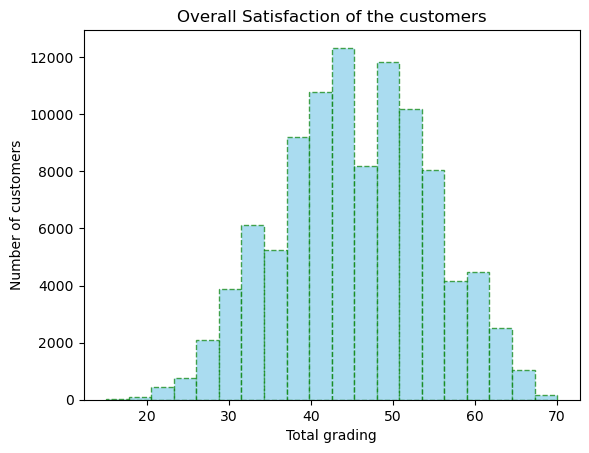

In [123]:
plt.hist(df["Overall_Satisfaction"], bins=20, color="skyblue", edgecolor='green',linestyle='--', alpha = 0.7)
plt.title("Overall Satisfaction of the customers")
plt.xlabel("Total grading")
plt.ylabel("Number of customers")
plt.show()

In [124]:
# Add day name and type
df['Days_of_the_week'] = df['Date'].dt.day_name()

In [125]:
# flights_days = df['Days_of_the_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_counts = df['Days_of_the_week'].value_counts().reindex(day_order)

<Figure size 1000x600 with 0 Axes>

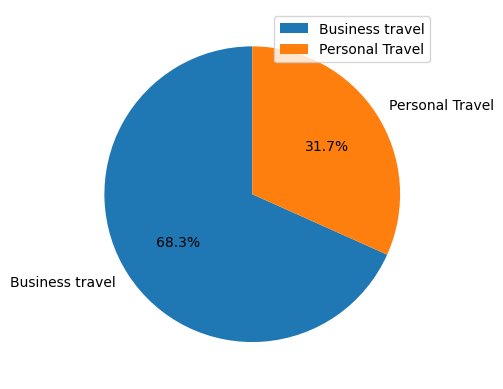

In [126]:
purpose_travel = df["Type of Travel"].value_counts()

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.pie(purpose_travel, labels=purpose_travel.index, autopct='%1.1f%%', startangle=90)
ax.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

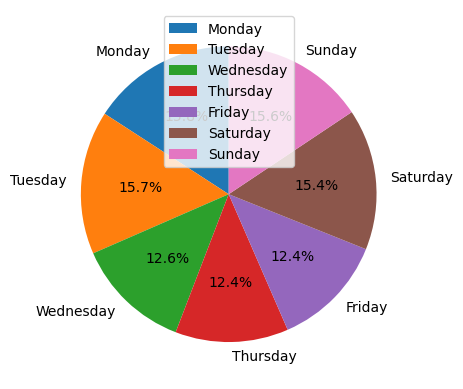

In [127]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots()
ax.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
ax.legend()
plt.show()

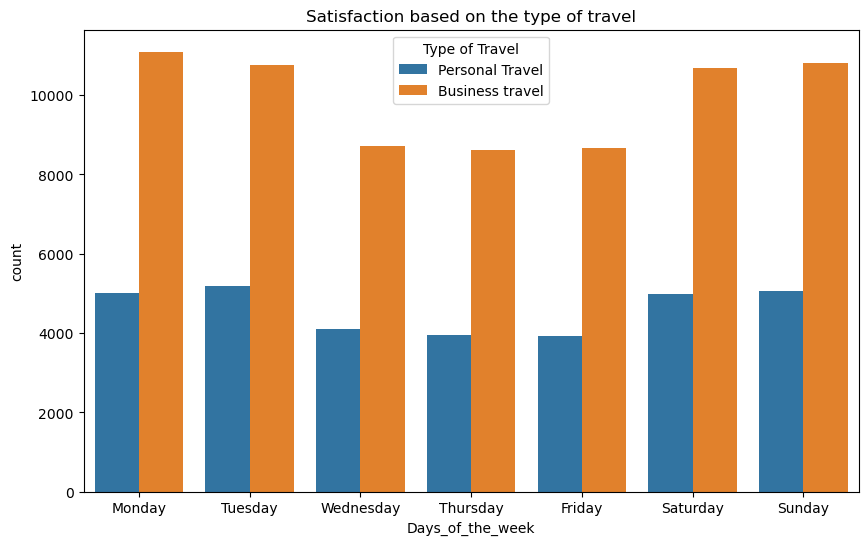

In [128]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the existing column
df['Days_of_the_week'] = pd.Categorical(
    df['Days_of_the_week'], 
    categories=day_order, 
    ordered=True)

plt.figure(figsize=(10,6))
sns.countplot(data = df, x="Days_of_the_week", hue="Type of Travel")

plt.title("Satisfaction based on the type of travel")
plt.show()

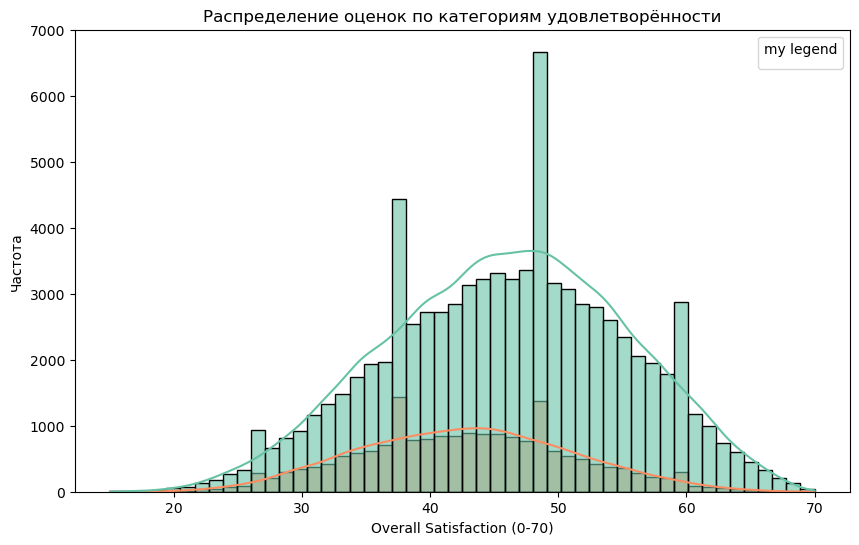

In [129]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Overall_Satisfaction', hue='Customer Type', 
             bins=50, alpha=0.6, kde=True, palette='Set2')
plt.title('Распределение оценок по категориям удовлетворённости')
plt.xlabel('Overall Satisfaction (0-70)')
plt.ylabel('Частота')
plt.legend(title="my legend", handles=[])
plt.show()

In [130]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,Date,Age_Group,Signup_Weekday,Signup_Weekend,Overall_Satisfaction,Days_of_the_week
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,25,18,Neutral or Dissatisfied,2022-10-20,Young,3,0,54,Thursday
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,6,Neutral or Dissatisfied,2022-10-08,Young,5,1,32,Saturday
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,0,0,Satisfied,2022-10-11,Adult,1,0,52,Tuesday
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,11,9,Neutral or Dissatisfied,2022-10-25,Young,1,0,42,Tuesday
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,0,0,Satisfied,2022-10-23,Middle_Aged,6,1,49,Sunday


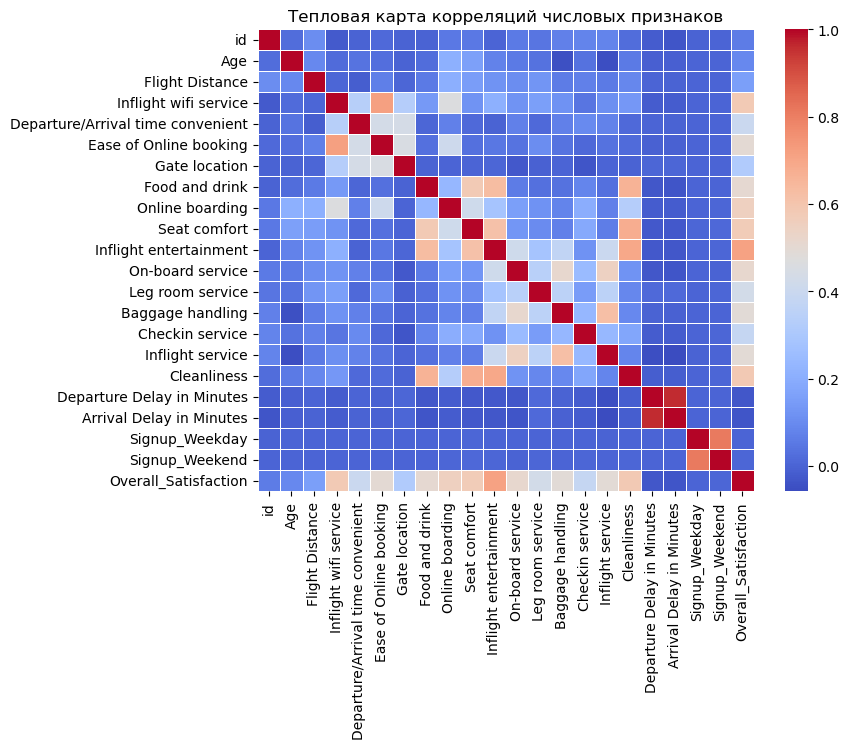

In [131]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
)

plt.title("Тепловая карта корреляций числовых признаков", fontsize=12)

plt.show()

In [42]:
# Краткий анализ:
# Авиакомпания востребована среди "бизнесменов", так как более 50% поездок совершаются с целью ведения бизнеса. 
# Из pie chart можно увидеть, что самым популярном классом обслуживания в авиакомпании является бизнес класс, составивший 46,7% от общего числа пассажиров. 
# Самым популярным днем для совершения поездак, с небольши отрывом, является понедельник.
# Из таблицы корреляции видно, что в целом оценки, данные пассажирами, между собой несильно связаны. 
# При это можно выявить некую зависимость между показателями удовлетворенностью чистотой и кейтерингом, комфортом места и развлечениями на борту.
# Простота онлайн бронирования связана с вай-фаем на борту (что странно, ведь обычно бронируют не в полете).
# Показатель overall_satisfaction сильнее всего коррелирует с inflight entertainment.
# Целевая аудитория авиакомпании - люди в возрасте 30-40 лет, занятые с сфере бизнеса, достаточно состоятельные, чтобы позволить себе билет в бизнес классе.
# Стоит обратить внимание на чистоту посадочных мест и развлечений во время полета.
# Самая сильная корреляция между задержки вылета и прилета, что логично.

In [132]:
df.to_csv("Обработанные данные.csv", index=False)